<a href="https://colab.research.google.com/github/bineee39/first-repository/blob/master/%EA%B8%B0%EC%B4%88_%ED%86%B5%EA%B3%84_MainQuest03_%EA%B9%80%EA%B7%9C%EB%B9%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
!pip install kagglehub

In [75]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Using Colab cache for faster access to the 'online-retail' dataset.
Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [76]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [78]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [79]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [80]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,4,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,4,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4,12
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,4,12


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [81]:
# random sampling으로 1000개의 표본 추출
sample_df = df.sample(n=1000, random_state=42)

#모집단과 표본 TotalPrice의 평균 비교
original_mean = df['TotalPrice'].mean()
sample_mean = sample_df['TotalPrice'].mean()

print(f"전체 데이터셋 TotalPrice 평균: {original_mean:.2f}")
print(f"표본 데이터셋 TotalPrice 평균: {sample_mean:.2f}")

#모집단과 표본 TotalPrice의 표준편차 비교
original_std = df['TotalPrice'].std()
sample_std = sample_df['TotalPrice'].std()

print(f"전체 데이터셋 TotalPrice 표준편차: {original_std:.2f}")
print(f"표본 데이터셋 TotalPrice 표준편차: {sample_std:.2f}")

전체 데이터셋 TotalPrice 평균: 17.99
표본 데이터셋 TotalPrice 평균: 16.83
전체 데이터셋 TotalPrice 표준편차: 378.81
표본 데이터셋 TotalPrice 표준편차: 64.47


중심 극한 정리(CLT)란, 모집단 분포의 형태에 관계없이 표본의 크기가 충분히 크다면 여러 표본에서 얻은 평균들의 분포는 정규 분포에 가까워진다는 이론이다.
이 평균들의 평균은 모집단의 평균과 같아지고, 표본 평균의 표준편차는 모집단 표준편차를 표본 크기의 제곱근으로 나눈 값과 같다.
위 결과에서 표본 평균이 모집단 평균과 약간의 차이를 보이는 것은 무작위 표본 추출에 따른 표본오차 때문이다.
표본의 크기가 커질수록 표본 평균은 모집단 평균에 더 가까워지게 된다. 표준편차의 경우, 표본의 표준편차가 모집단의 표준편차보다 작게 나온 것은
전체 데이터셋에 극단적인 이상치가 포함되어 있을 가능성이 높다는 것을 의미한다.(표본에는 이러한 이상치가 포함되지 않아 표준편차가 작게 나왔을 것이다) .

## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [82]:
from scipy.stats import ttest_ind, shapiro, levene

# 주문이 가장 많은 상위 두 국가 찾기
country_counts = df['Country'].value_counts().sort_values(ascending=False)
top_countries = country_counts.head(2).index.tolist()
print(f"주문이 가장 많은 상위 두 국가: {top_countries}")

country_1_df = df[df['Country'] == top_countries[0]]
country_2_df = df[df['Country'] == top_countries[1]]

# 정규성 검정 (Shapiro-Wilk test)
# 표본 크기가 큰 경우 Shapiro-Wilk 검정은 귀무가설을 기각하는 경향이 있으므로 시각적 확인이 더 중요할 수 있습니다.
shapiro_test_country1 = shapiro(country_1_df['TotalPrice'].dropna())
shapiro_test_country2 = shapiro(country_2_df['TotalPrice'].dropna())

print(f"\n{top_countries[0]} TotalPrice 정규성 검정 (Shapiro-Wilk):")
print(f"검정 통계량: {shapiro_test_country1.statistic:.4f}, P-값: {shapiro_test_country1.pvalue:.4f}")

print(f"\n{top_countries[1]} TotalPrice 정규성 검정 (Shapiro-Wilk):")
print(f"검정 통계량: {shapiro_test_country2.statistic:.4f}, P-값: {shapiro_test_country2.pvalue:.4f}")

#결과: 두 데이터 모두 정규성을 만족하지 않음. 그러나 두 데이터의 크기가 크다는 것을 감안해 t-검정을 사용하기로함

# 등분산성 검정 (Levene's test)
levene_test = levene(country_1_df['TotalPrice'].dropna(), country_2_df['TotalPrice'].dropna())

print(f"\nTotalPrice 등분산성 검정 (Levene's test):")
print(f"검정 통계량: {levene_test.statistic:.4f}, P-값: {levene_test.pvalue:.4f}")

#결과: pvalue가 0.05보다 크므로 등분산성을 만족함.아래 ttest에서 equal_var=true

# 독립표본 t-검정 수행
ttest_result = ttest_ind(country_1_df['TotalPrice'], country_2_df['TotalPrice'], nan_policy='omit', equal_var=(levene_test.pvalue > 0.05))

print(f"\n독립표본 t-검정 결과:")
print(f"T-통계량: {ttest_result.statistic:.4f}")
print(f"P-값: {ttest_result.pvalue:.4f}")

주문이 가장 많은 상위 두 국가: ['United Kingdom', 'Germany']

United Kingdom TotalPrice 정규성 검정 (Shapiro-Wilk):
검정 통계량: 0.0080, P-값: 0.0000

Germany TotalPrice 정규성 검정 (Shapiro-Wilk):
검정 통계량: 0.4488, P-값: 0.0000

TotalPrice 등분산성 검정 (Levene's test):
검정 통계량: 0.2566, P-값: 0.6125

독립표본 t-검정 결과:
T-통계량: -1.6839
P-값: 0.0922


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 495478.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9495.
  res = hypotest_fun_out(*samples, **kwds)


T-통계량: -1.6839
P-값: 0.0922

결과 해석:
일반적으로 유의수준을 0.05로 설정했을 때, p값이 0.05보다 작으면 두 그룹의 평균 차이가 통계적으로 유의미하다고 판단한다. 위 결과에서 p값은 0.05보다 크므로, 주문이 가장 많은 상위 두 국가 간의 TotalPrice 평균 차이가 통계적으로 유의미하지 않다는 결론이 나왔다. 표본 데이터만으로는 두 국가의 평균 TotalPrice에 차이가 있다고 단정하기 어렵다

1종 오류: 실제로는 두 국가의 평균 TotalPrice에 차이가 없는데, 통계적 검정 결과 차이가 있다고 잘못 판단하는 오류이다. 유의수준은 1종 오류를 범할 확률로, 사전에 사용자가 임의로 설정하고 들어간다. 현재 분석에서는 p-값이 0.05보다 크므로 1종 오류를 범할 가능성은 낮다.

2종 오류: 실제로는 두 국가의 평균 TotalPrice에 차이가 있는데, 통계적 검정 결과 차이가 없다고 잘못 판단하는 오류이다. 표본 크기가 작거나 효과 크기(두 그룹 평균의 실제 차이)가 작을 때 발생하기 쉽다. 현재 결과에서 통계적으로 유의미한 차이가 없다고 결론 내렸지만,2종 오류도 배제할 수는 없다.

## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [83]:
# 주중과 주말 데이터 분리
# 주중: 0, 1, 2, 3, 4
# 주말: 5, 6
weekday_df = df[df['DayOfWeek'] <= 4]
weekend_df = df[df['DayOfWeek'] > 4]

print("주중 UnitPrice 분포 분석")
print(weekday_df['UnitPrice'].describe())
print("\n주중 UnitPrice 분산:", weekday_df['UnitPrice'].var())
print("\n주중 UnitPrice 표준편차:", weekday_df['UnitPrice'].std())
print("\n주중 UnitPrice 분위수:\n", weekday_df['UnitPrice'].quantile([0.25, 0.5, 0.75]))

print("\n 주말 UnitPrice 분포 분석 ")
print(weekend_df['UnitPrice'].describe())
print("\n주말 UnitPrice 분산:", weekend_df['UnitPrice'].var())
print("\n주말 UnitPrice 표준편차:", weekend_df['UnitPrice'].std())
print("\n주말 UnitPrice 분위수:\n", weekend_df['UnitPrice'].quantile([0.25, 0.5, 0.75]))

주중 UnitPrice 분포 분석
count    477534.000000
mean          4.843425
std         103.032058
min      -11062.060000
25%           1.250000
50%           2.100000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

주중 UnitPrice 분산: 10615.604926584541

주중 UnitPrice 표준편차: 103.03205776157508

주중 UnitPrice 분위수:
 0.25    1.25
0.50    2.10
0.75    4.13
Name: UnitPrice, dtype: float64

 주말 UnitPrice 분포 분석 
count    64375.000000
mean         2.887824
std          7.959497
min          0.000000
25%          1.250000
50%          1.850000
75%          3.750000
max       1236.750000
Name: UnitPrice, dtype: float64

주말 UnitPrice 분산: 63.353598661592024

주말 UnitPrice 표준편차: 7.959497387498285

주말 UnitPrice 분위수:
 0.25    1.25
0.50    1.85
0.75    3.75
Name: UnitPrice, dtype: float64


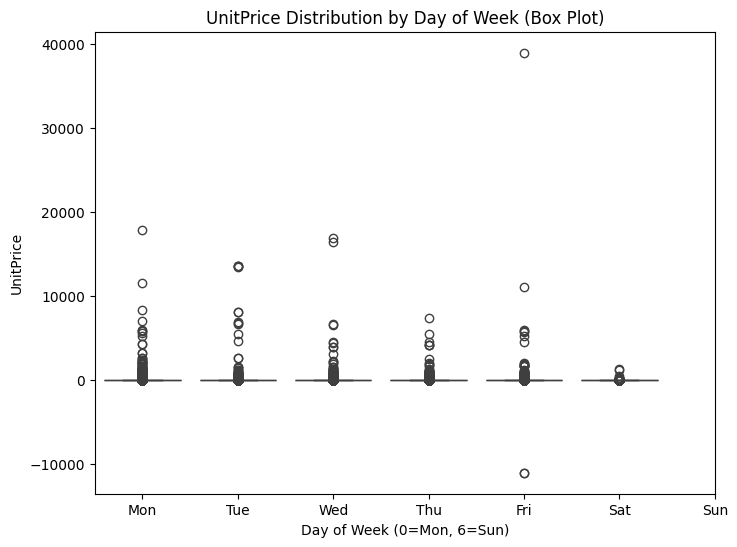

In [84]:
# 주중과 주말 UnitPrice boxplot 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(x='DayOfWeek', y='UnitPrice', data=df)
plt.title('UnitPrice Distribution by Day of Week (Box Plot)')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('UnitPrice')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

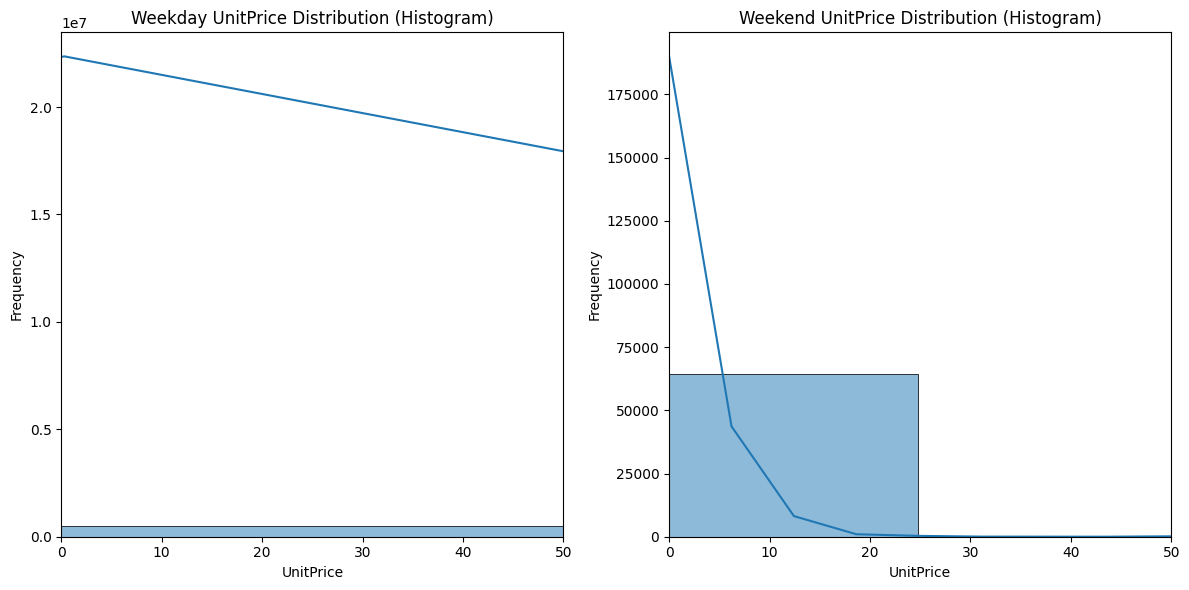

In [85]:
# 주중과 주말 UnitPrice 히스토그램 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(weekday_df['UnitPrice'], bins=50, kde=True)
plt.title('Weekday UnitPrice Distribution (Histogram)')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.xlim(0, 50) # Limit x-axis for better visualization of common values

plt.subplot(1, 2, 2)
sns.histplot(weekend_df['UnitPrice'], bins=50, kde=True)
plt.title('Weekend UnitPrice Distribution (Histogram)')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.xlim(0, 50) # Limit x-axis for better visualization of common values

plt.tight_layout()
plt.show()

주중 및 주말 UnitPrice 분포 분석 결과:

1.기술 통계량 분석:
평균: 주중 UnitPrice 평균은 주말 평균보다 높다.
주중 고객이 평균적으로 더 비싼 상품을 구매하는 경향이 있는것을 보인다.
표준편차 및 분산: 주중의 표준편차와 분산이 주말의 표준편차와 분산보다 훨씬 높다.
주중 UnitPrice 데이터의 변동성이 크고 이상치의 영향을 받음으로 보인다.
실제로 주중 boxplot을 보면 이상치가 확인된다.
주중 고객의 UnitPrice가 훨씬 폭넓은 범위에 분포함을 의미한다.
중앙값: 주중 중앙값과 주말 중앙값은 평균에 비해 차이가 작다.
사분위수: 두 그룹 모두 낮은 값에 집중되어 있으며, 주중의 3사분위수가 주말보다 약간 높다.
중앙값과 사분위수로 보아 고가의 물건을 구매하는 고객이 소수임을 알 수 있다.

2.시각화 분석 결과 요약 (boxplot 및 히스토그램):

boxplot: 주중 상자그림은 주말에 비해 상자가 크고 수염이 매우 길며, 높은 가격의 이상치가 많다.
히스토그램: 두 그룹 모두 0에 가까운 낮은 UnitPrice에 데이터가 집중된 오른쪽으로 긴 꼬리를 갖는 치우친 분포 형태를 보인다. 주중 히스토그램은 주말보다 더 넓은 범위에 분포한다.


## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [86]:
# 1. 데이터 전처리
regression_df = df[['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']].copy()

# 결측치 확인
print("결측치 확인:")
print(regression_df.isnull().sum())

# 이상치 제거: Quantity와 UnitPrice가 0보다 큰 값만 사용
regression_df = regression_df[(regression_df['Quantity'] > 0) & (regression_df['UnitPrice'] > 0)]

# 범주형 변수 OneHot Encoding
regression_df = pd.get_dummies(regression_df, columns=['Country'], drop_first=True)

# 데이터 확인
print("\n전처리 확인:")
display(regression_df.head())

결측치 확인:
Quantity        0
UnitPrice       0
Country         0
DayOfWeek       0
InvoiceMonth    0
dtype: int64

전처리 확인:


,Quantity,UnitPrice,DayOfWeek,InvoiceMonth,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,6,2.55,2,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,6,3.39,2,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,8,2.75,2,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,3.39,2,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,6,3.39,2,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [87]:
regression_df.describe()

,Quantity,UnitPrice,DayOfWeek,InvoiceMonth
count,530104.000000,530104.000000,530104.000000,530104.000000
mean,10.542037,3.907625,2.436626,7.560611
std,155.524124,35.915681,1.850651,3.508496
min,1.000000,0.001000,0.000000,1.000000
25%,1.000000,1.250000,1.000000,5.000000
50%,3.000000,2.080000,2.000000,8.000000
75%,10.000000,4.130000,4.000000,11.000000
max,80995.000000,13541.330000,6.000000,12.000000


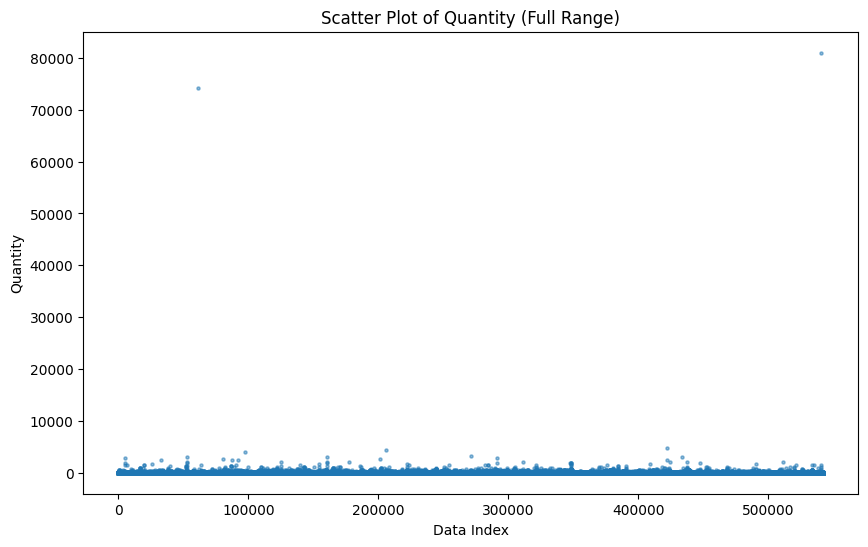

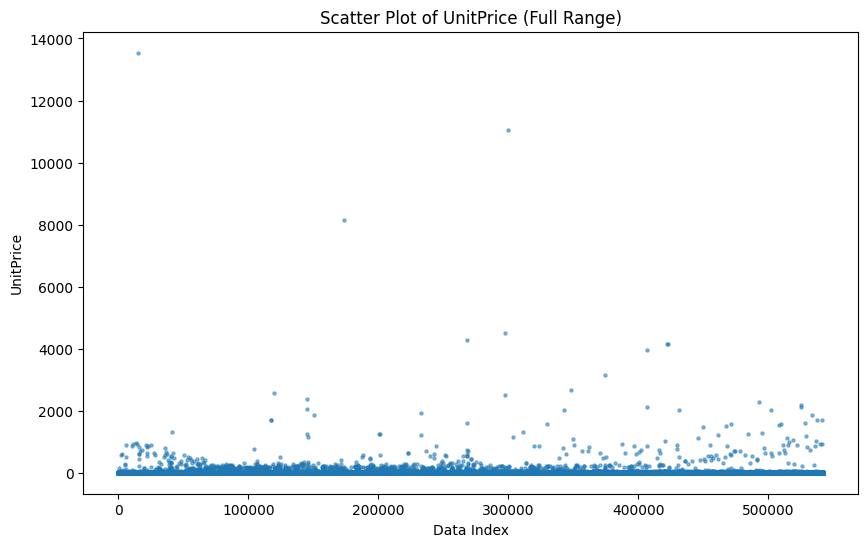

In [88]:
# 이상치 확인을 위한 Quantity 및 UnitPrice 분포 시각화 (산점도)

# Quantity 분포 시각화 (산점도)
plt.figure(figsize=(10, 6))
plt.scatter(regression_df.index, regression_df['Quantity'], alpha=0.5, s=5) # x축은 인덱스 사용
plt.title('Scatter Plot of Quantity (Full Range)')
plt.xlabel('Data Index')
plt.ylabel('Quantity')
plt.show()


# UnitPrice 분포 시각화 (산점도)
plt.figure(figsize=(10, 6))
plt.scatter(regression_df.index, regression_df['UnitPrice'], alpha=0.5, s=5) # x축은 인덱스 사용
plt.title('Scatter Plot of UnitPrice (Full Range)')
plt.xlabel('Data Index')
plt.ylabel('UnitPrice')
plt.show()


In [89]:
# 이상치 제거: Quantity가 30000 초과 또는 UnitPrice가 6000 초과하는 행 제거

initial_shape = regression_df.shape
regression_df = regression_df[(regression_df['Quantity'] <= 30000) & (regression_df['UnitPrice'] <= 6000)]
final_shape = regression_df.shape

print(f"이상치 제거 전 데이터 Shape: {initial_shape}")
print(f"이상치 제거 후 데이터 Shape: {final_shape}")
print(f"제거된 행 수: {initial_shape[0] - final_shape[0]}")

display(regression_df.head())

이상치 제거 전 데이터 Shape: (530104, 41)
이상치 제거 후 데이터 Shape: (530099, 41)
제거된 행 수: 5


,Quantity,UnitPrice,DayOfWeek,InvoiceMonth,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,6,2.55,2,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,6,3.39,2,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,8,2.75,2,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,3.39,2,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,6,3.39,2,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [90]:
regression_df.describe()

,Quantity,UnitPrice,DayOfWeek,InvoiceMonth
count,530099.000000,530099.000000,530099.000000,530099.000000
mean,10.249336,3.845883,2.436628,7.560610
std,37.793649,24.260925,1.850654,3.508488
min,1.000000,0.001000,0.000000,1.000000
25%,1.000000,1.250000,1.000000,5.000000
50%,3.000000,2.080000,2.000000,8.000000
75%,10.000000,4.130000,4.000000,11.000000
max,4800.000000,4505.170000,6.000000,12.000000


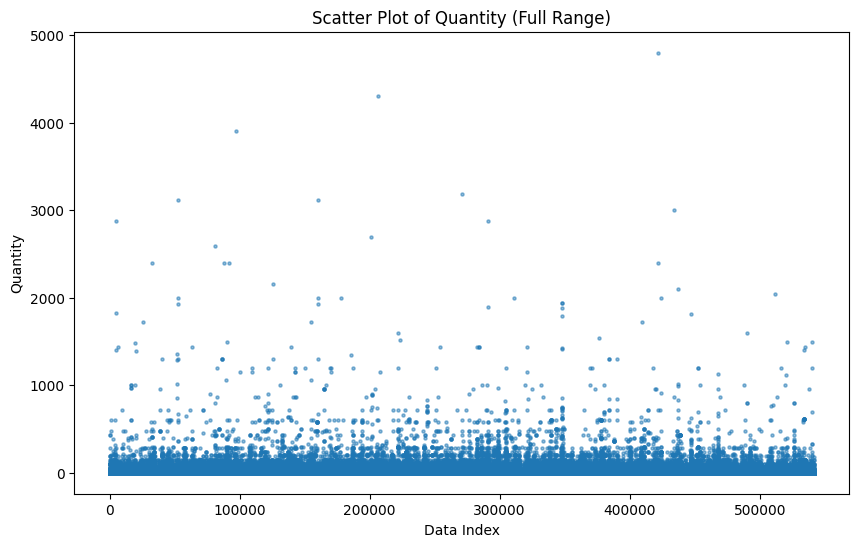

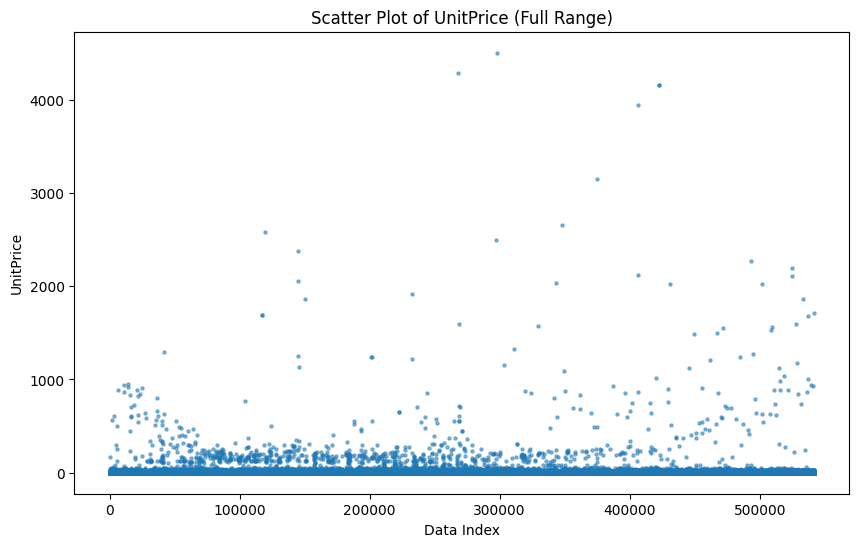

In [91]:
# Quantity 분포 시각화 (산점도)
plt.figure(figsize=(10, 6))
plt.scatter(regression_df.index, regression_df['Quantity'], alpha=0.5, s=5) # x축은 인덱스 사용
plt.title('Scatter Plot of Quantity (Full Range)')
plt.xlabel('Data Index')
plt.ylabel('Quantity')
plt.show()


# UnitPrice 분포 시각화 (산점도)
plt.figure(figsize=(10, 6))
plt.scatter(regression_df.index, regression_df['UnitPrice'], alpha=0.5, s=5) # x축은 인덱스 사용
plt.title('Scatter Plot of UnitPrice (Full Range)')
plt.xlabel('Data Index')
plt.ylabel('UnitPrice')
plt.show()

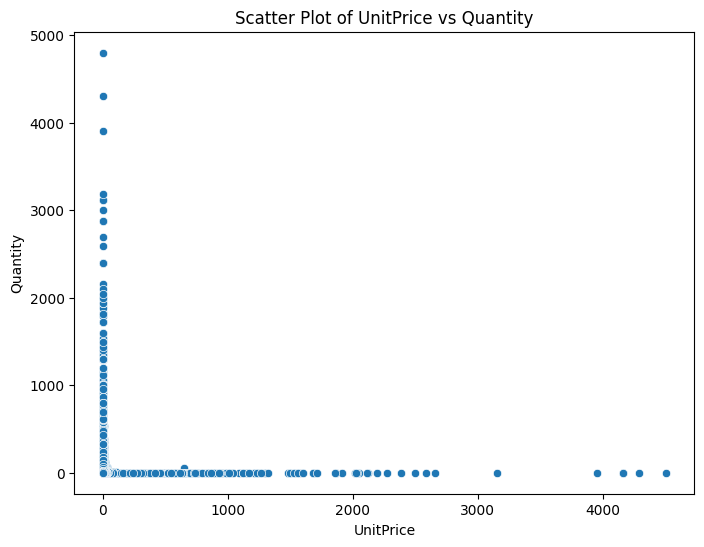

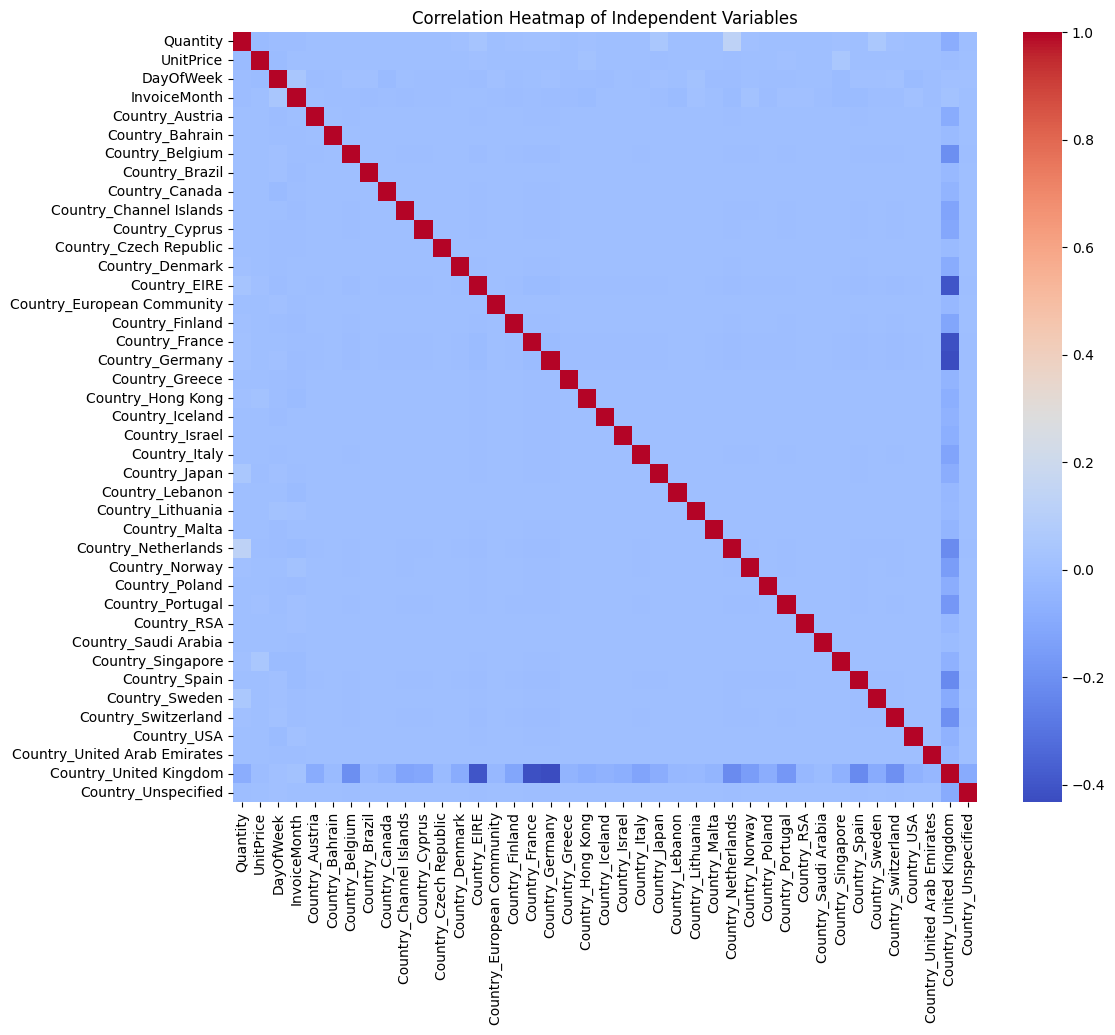

In [92]:
# 2. 회귀 분석 전 가정 확인

# 회귀 모델에 사용할 독립변수와 종속변수 선택
regression_vars_df = regression_df[['Quantity', 'UnitPrice', 'DayOfWeek', 'InvoiceMonth'] + list(regression_df.filter(like='Country_').columns)].copy()

# 선형성 확인: 독립변수와 종속변수(Quantity) 간의 산점도 (연속형변수)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=regression_vars_df)
plt.title('Scatter Plot of UnitPrice vs Quantity')
plt.xlabel('UnitPrice')
plt.ylabel('Quantity')
plt.show()


# 다중공선성 확인: 독립변수 간 상관관계 히트맵
# 회귀 모델에 사용할 모든 독립변수 간의 상관관계를 확인.
plt.figure(figsize=(12, 10))
sns.heatmap(regression_vars_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Independent Variables')
plt.show()


산점도를 봤을 때 강한 선형관계가 나타나지 않아 다중회귀를 진행해도 유의미한 결과가 나오기 힘들것으로 예측된다. UnitPrice가 낮은 영역에 대부분의 데이터 포인트가 밀집되어 있었으며 패턴이 뚜렷하게 나타나지 않음을 확인했다.

히트맵으로 다중공산성의 우려가 있는지도 확인해보았다.
대부분의 상관관계가 절댓값 0.4 이하로 다중공산성이 우려되진 않아보인다.

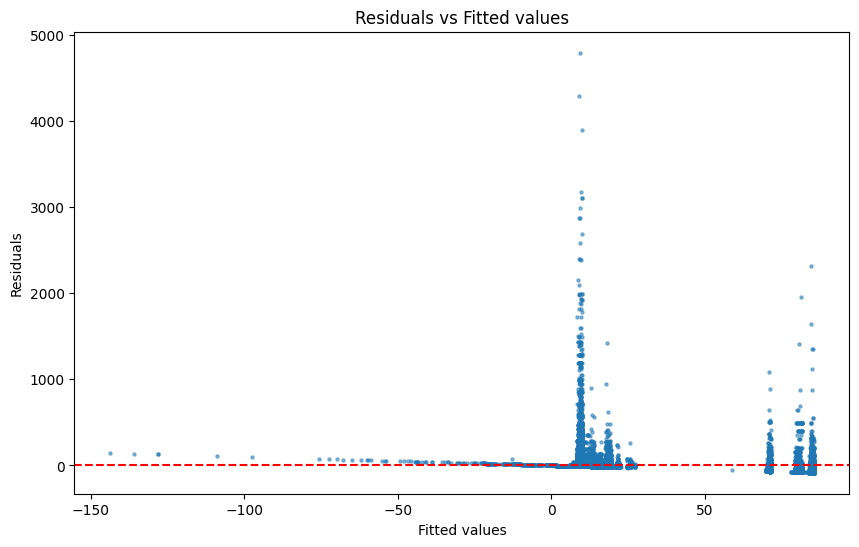

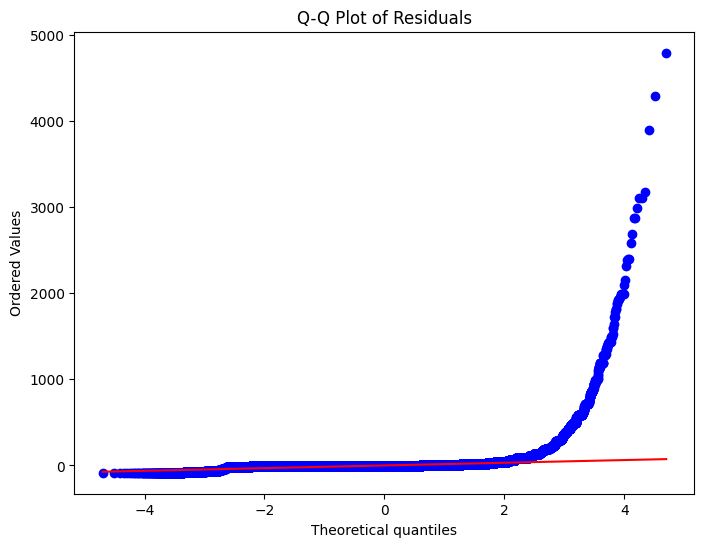

In [93]:
# 4. 잔차 분석을 통한 가정 확인 (등분산성 및 정규성)

# 등분산성 확인: 잔차 vs 예측값 산점도
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5, s=5)
plt.axhline(y=0, color='r', linestyle='--') # 잔차가 0인 기준선 추가
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

# 잔차의 정규성 확인: Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# 잔차의 정규성을 통계적으로 검정 (선택 사항, 시각적 확인이 더 중요할 수 있음)
# from scipy.stats import shapiro
# shapiro_test_residuals = shapiro(residuals)
# print(f"\n잔차 정규성 검정 (Shapiro-Wilk):")
# print(f"검정 통계량: {shapiro_test_residuals.statistic:.4f}, P-값: {shapiro_test_residuals.pvalue:.4f}")

잔차 vs 예측값 산점도를 보면, 잔차들이 예측값 0 주변에 밀집되어 있지만, 예측값이 커짐에 따라 잔차의 퍼짐 정도(분산)가 넓어지는 깔때기 모양 패턴이 뚜렷하게 보인다. 이는 잔차의 분산이 일정하지 않다는 것을 의미하며, 다중 선형 회귀의 등분산성 가정이 충족되지 않았음을 보여준다.

잔차의 Q-Q plot을 보면, 점들이 대각선 직선을 따라가지 않고, 특히 양쪽 끝 부분에서 직선에서 벗어나는 것을 알 수 있다. 이는 잔차가 정규 분포를 따르지 않으며, 잔차의 정규성 가정도 충족되지 않았음을 시사한다.

다중회귀 선행 가정인 등분산성과 잔차의 정규성이 모두 위배되었다. 이러한 가정 위배는 회귀 모델의 결과(특히 회귀계수의 통계적 유의성) 해석에 영향을 줄 수 있다.

In [94]:
# 3. 모델 학습

import statsmodels.api as sm
# 독립변수 (X)와 종속변수 (y) 설정(이상치제거한것)
X = regression_df.drop('Quantity', axis=1)
y = regression_df['Quantity']

bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)


# 다중회귀 모델 학습
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# 모델 결과 요약 출력 (회귀계수, R-squared 등 포함)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     419.3
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        06:11:03   Log-Likelihood:            -2.6693e+06
No. Observations:              530099   AIC:                         5.339e+06
Df Residuals:                  530058   BIC:                         5.339e+06
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

회귀 모델 결과:
R-squared를 보면 0.031로 매우 낮은 설명력이다.
이 모델에 사용된 독립변수들이 종속변수를 3.1퍼센트 설명한다는 의미이고,
나머지 퍼센트는 오차로 설명된다는 의미이다.
수정된 결정계수도 같다.
사용된 F 통계량의 수치가 큰 것으로 보아(pvalue는 작다) 통계적으로 유의미하긴하다.
각 독립변수의 기울기도p-value가 0.05보다 작아 0이 아니라 유의미하다고 결론이 도출되었지만 이 변수들만으로는 판매 수량의 대부분을 설명하긴 어렵다.
또한 위의 등분산성 위배, 잔차의 정규성도 위배됨을 보였으므로 회귀계수와 p값의 정확한 해석에도 한계가 있다.


## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [95]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


In [96]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,DayOfWeek,InvoiceMonth
count,541909.000000,541909,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,17.987795,2.431277,7.553128
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,-168469.600000,0.000000,1.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,3.400000,1.000000,5.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,9.750000,2.000000,8.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,17.400000,4.000000,11.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000,6.000000,12.000000
std,218.081158,NaN,96.759853,1713.600303,378.810824,1.844709,3.509055


In [98]:
#IsReturn 변수 생성
df['IsReturn'] = (df['Quantity'] < 0).astype(int)

display(df.head())
display(df['IsReturn'].value_counts())

IsReturn 변수 생성 완료.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,IsReturn
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,0


,count
IsReturn,
0,531285
1,10624


불균형데이터이다

In [99]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,IsReturn
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,0


In [100]:
df['StockCode'].value_counts()

,count
StockCode,
85123A,2313
22423,2203
85099B,2159
47566,1727
20725,1639
...,...
85179a,1
23617,1
90214U,1


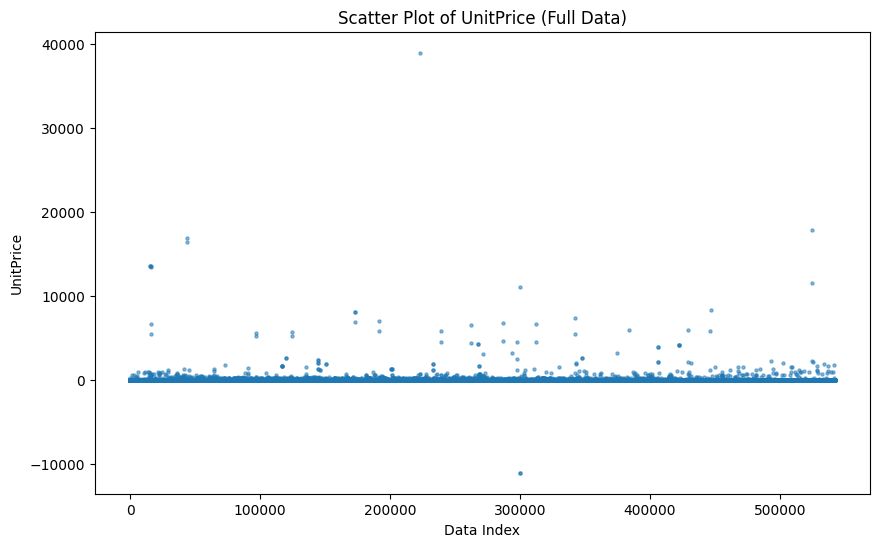

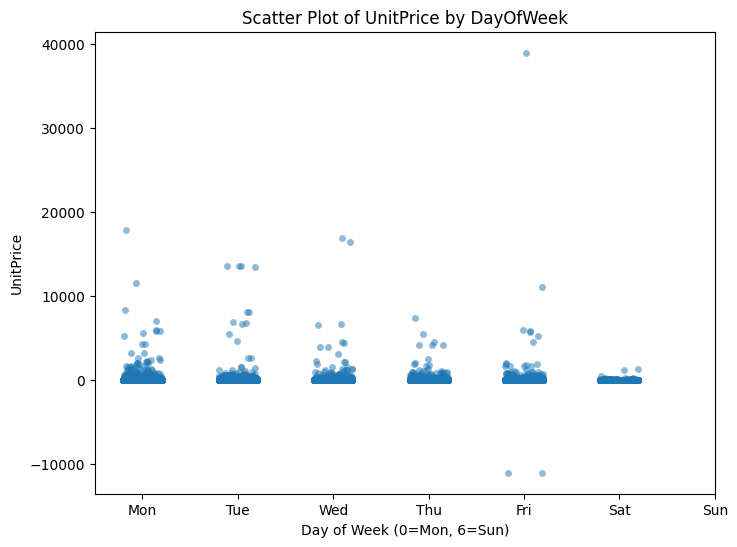

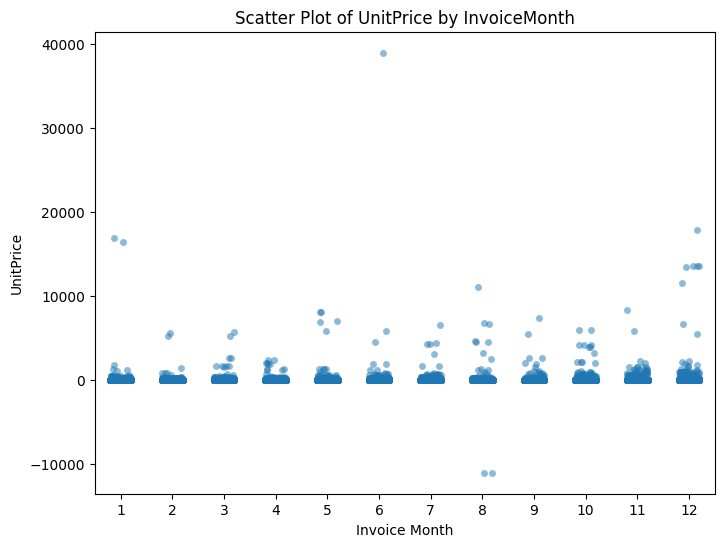

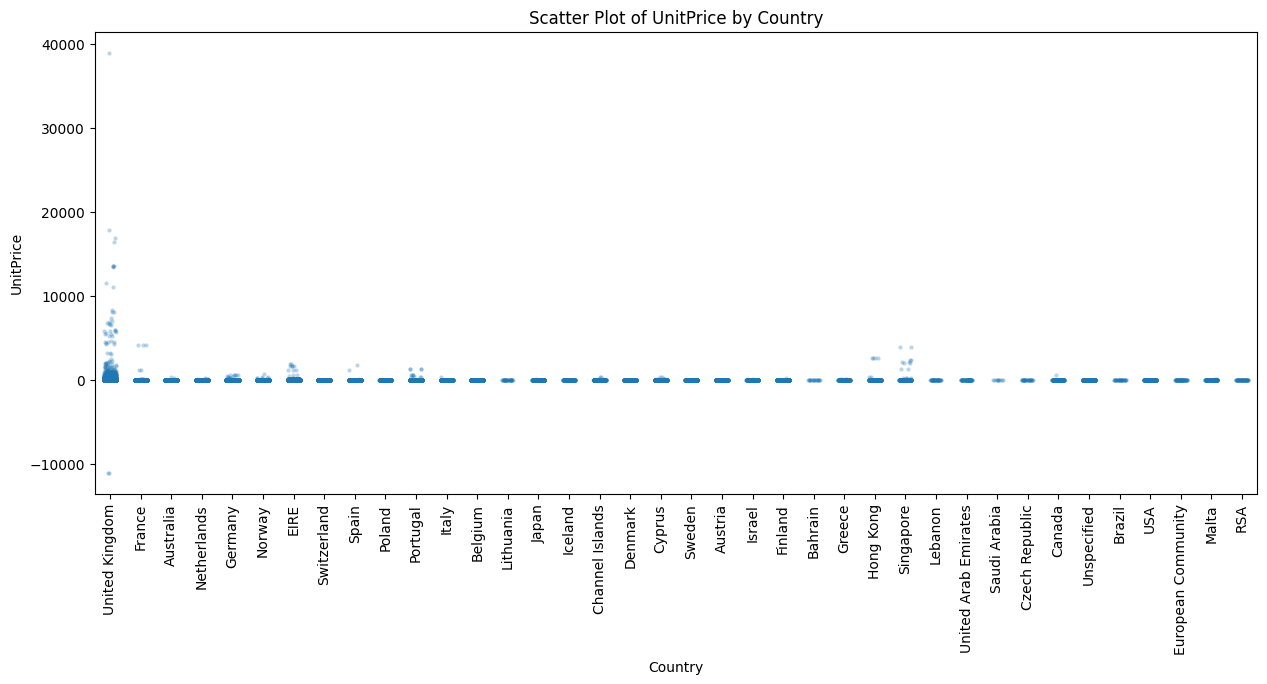

In [102]:
#이상치 확인(산점도)

# UnitPrice 산점도
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['UnitPrice'], alpha=0.5, s=5)
plt.title('Scatter Plot of UnitPrice (Full Data)')
plt.xlabel('Data Index')
plt.ylabel('UnitPrice')
plt.show()

# DayOfWeek 산점도
plt.figure(figsize=(8, 6))
sns.stripplot(x='DayOfWeek', y='UnitPrice', data=df, jitter=0.2, alpha=0.5, s=5)
plt.title('Scatter Plot of UnitPrice by DayOfWeek')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('UnitPrice')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# InvoiceMonth 산점도
plt.figure(figsize=(8, 6))
sns.stripplot(x='InvoiceMonth', y='UnitPrice', data=df, jitter=0.2, alpha=0.5, s=5)
plt.title('Scatter Plot of UnitPrice by InvoiceMonth')
plt.xlabel('Invoice Month')
plt.ylabel('UnitPrice')
plt.show()


# Country별 UnitPrice 분포
plt.figure(figsize=(15, 6))
sns.stripplot(x='Country', y='UnitPrice', data=df, jitter=0.2, alpha=0.3, s=3)
plt.title('Scatter Plot of UnitPrice by Country')
plt.xlabel('Country')
plt.ylabel('UnitPrice')
plt.xticks(rotation=90)
plt.show()


In [110]:
# 로지스틱 회귀 모델에 사용할 독립변수 및 종속변수 데이터프레임 생성

# 사용할 독립변수 목록
independent_vars = ['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']
# 종속변수
target_var = 'IsReturn'

# UnitPrice 이상치(> 30000) 제거가 적용된 df를 사용
df_cleaned_for_logistic = df[df['UnitPrice'] <= 30000].copy()

# 필요한 컬럼만 선택
logistic_model_df = df_cleaned_for_logistic[independent_vars + [target_var]].copy()

# UnitPrice가 0 이하인 값 제거
logistic_model_df = logistic_model_df[logistic_model_df['UnitPrice'] > 0].copy()

# 결측치 확인
print("logistic_model_df 결측치 확인:")
print(logistic_model_df.isnull().sum())


#One-Hot Encoding
logistic_model_df = pd.get_dummies(logistic_model_df, columns=['Country'], drop_first=True)

print("\n로지스틱 회귀 모델 학습/평가용 데이터프레임 생성 완료.")
display(logistic_model_df.head())
print("\n데이터 정보:")
logistic_model_df.info()
print("\nIsReturn 분포:")
print(logistic_model_df['IsReturn'].value_counts())

logistic_model_df 결측치 확인:
UnitPrice       0
Country         0
DayOfWeek       0
InvoiceMonth    0
IsReturn        0
dtype: int64

로지스틱 회귀 모델 학습/평가용 데이터프레임 생성 완료.


,UnitPrice,DayOfWeek,InvoiceMonth,IsReturn,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,2.55,2,12,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,3.39,2,12,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2.75,2,12,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,3.39,2,12,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,3.39,2,12,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False



데이터 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 539391 entries, 0 to 541908
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   UnitPrice                     539391 non-null  float64
 1   DayOfWeek                     539391 non-null  int32  
 2   InvoiceMonth                  539391 non-null  int32  
 3   IsReturn                      539391 non-null  int64  
 4   Country_Austria               539391 non-null  bool   
 5   Country_Bahrain               539391 non-null  bool   
 6   Country_Belgium               539391 non-null  bool   
 7   Country_Brazil                539391 non-null  bool   
 8   Country_Canada                539391 non-null  bool   
 9   Country_Channel Islands       539391 non-null  bool   
 10  Country_Cyprus                539391 non-null  bool   
 11  Country_Czech Republic        539391 non-null  bool   
 12  Country_Denmark               539391 non

In [111]:
logistic_model_df.describe()

,UnitPrice,DayOfWeek,InvoiceMonth,IsReturn
count,539391.000000,539391.000000,539391.000000,539391.000000
mean,4.601408,2.432755,7.555808,0.017218
std,78.339753,1.846509,3.508833,0.130081
min,0.001000,0.000000,1.000000,0.000000
25%,1.250000,1.000000,5.000000,0.000000
50%,2.080000,2.000000,8.000000,0.000000
75%,4.130000,4.000000,11.000000,0.000000
max,17836.460000,6.000000,12.000000,1.000000


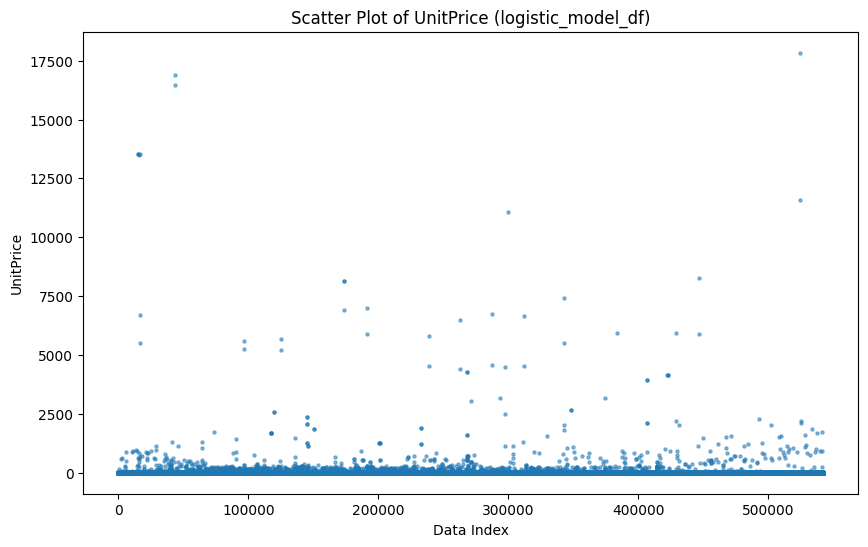

In [112]:
# logistic_model_df 데이터프레임의 UnitPrice 산점도 시각화

plt.figure(figsize=(10, 6))
plt.scatter(logistic_model_df.index, logistic_model_df['UnitPrice'], alpha=0.5, s=5)
plt.title('Scatter Plot of UnitPrice (logistic_model_df)')
plt.xlabel('Data Index')
plt.ylabel('UnitPrice')
plt.show()

In [116]:
# 데이터 분할

from sklearn.model_selection import train_test_split

# 독립변수와 종속변수 설정
X = logistic_model_df.drop('IsReturn', axis=1)
y = logistic_model_df['IsReturn']

bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(f"학습 세트 shape (X_train): {X_train.shape}, (y_train): {y_train.shape}")
print(f"테스트 세트 shape (X_test): {X_test.shape}, (y_test): {y_test.shape}")
print("\n학습 세트 IsReturn 분포:")
print(y_train.value_counts(normalize=True))
print("\n테스트 세트 IsReturn 분포:")
print(y_test.value_counts(normalize=True))

학습 세트 shape (X_train): (377573, 40), (y_train): (377573,)
테스트 세트 shape (X_test): (161818, 40), (y_test): (161818,)

학습 세트 IsReturn 분포:
IsReturn
0    0.98288
1    0.01712
Name: proportion, dtype: float64

테스트 세트 IsReturn 분포:
IsReturn
0    0.982554
1    0.017446
Name: proportion, dtype: float64


In [119]:
# 3. 로지스틱 회귀 모델 학습

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

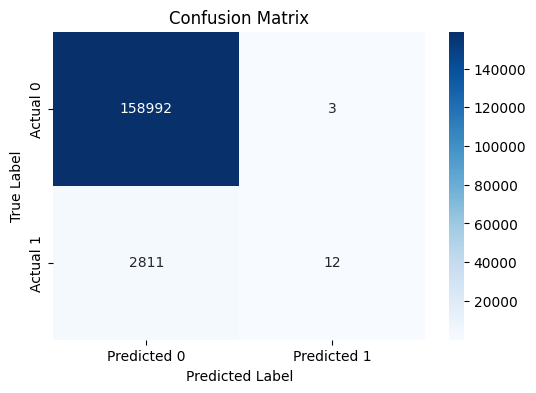


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    158995
           1       0.80      0.00      0.01      2823

    accuracy                           0.98    161818
   macro avg       0.89      0.50      0.50    161818
weighted avg       0.98      0.98      0.97    161818


Accuracy: 0.9826


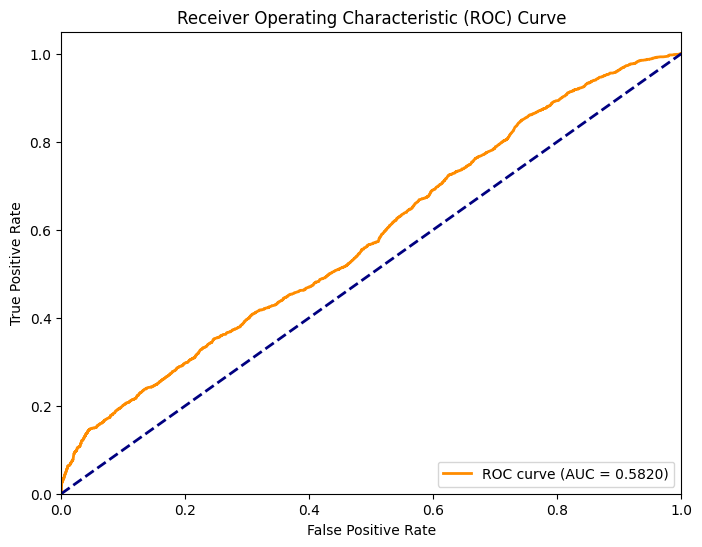

In [122]:
# 모델 성능 평가

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 테스트 세트로 예측 수행
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 혼동 행렬 계산 및 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 분류 보고서 출력 (정밀도, 재현율, F1-score 포함)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 정확도 출력 (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# ROC 곡선 및 AUC 계산 및 시각화
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# 결과해석
1.혼돈행렬
1종오류는 한개도 발생하지 않았다.하지만 2종오류가 약 3000개가량 발생하였으므로
반품 데이터가 그렇지 않은 데이터보다 적어(불균형) 모델이 무조건 반품이 아닐것이라고 예측했을 것으로 보인다.
2.정확도: 매우 높게 나왔다. 이또한 데이터셋이 심각하게 불균형이므로 이러한 결과가 도출된 것으로 보인다.
이것을 뒷받침해주는 근거가 재현률(recall)이다. 재현율은 실제 반품인 거래 중 모델이 반품이라고 올바르게 예측한 비율인데, 모델은 무조건 반품이 아닐것이라고 예측했기 때문에 이렇게 낮은 결과가 도출되었다.
때문에 정말도와 재현율의 조화평균인 F값도 매우 낮게 도출되었다.
3.ROC곡선: roc곡선의 면적이 0.5에 가깝게 나왔다는 것은 무작위 예측에 가깝다는 의미이다.

종합하자면 데이터 불균형이 심각하여 반품을 예측하는 성능이 너무 낮아 모델로서 유의미하지 않다.

# 해결방안
1. 우선 반품 데이터를 늘려야한다.오버샘플링을 통해 종속변수 데이터의 수를 늘려 균형을 어느정도 맞추어야한다.
2. 추가로 독립변수를 더 다듬어야 한다. 물건 종류에 관한 칼럼이 존재했는데 고유 수가 너무 많아 아예 칼럼을 드랍하고 진행하였다.
따로 규칙을 찾아 범주화하여 고유 수를 줄여 칼럼에 추가한다면 반품여부를 예측하는데 도움이 될 것이다.

3.다른 분류모델도 추가로 사용하고 비교해본다.
다른 분류모델이 로지스틱 회귀보다 성능이 좋을 수 있다. 의사결정나무,XGboost 등 여러 모델을 사용해보고 평가지표를 비교한 뒤 가장 성능이 좋은 모델을 선택하는 것이 좋다.